In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmw-global-sales-and-market-data/bmw_global_sales_dataset.csv


<h4>This notebook explores a global BMW vehicle sales dataset and analyzes how market,
economic, and operational factors influence sales performance.

Goals:
- Perform exploratory data analysis (EDA)
- Identify key sales drivers
- Build a regression model to predict vehicle sales</h4>


<h1>1. Import Libraries</h1>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

<h1>2. Load Dataset</h1>

In [8]:
df = pd.read_csv("/kaggle/input/bmw-global-sales-and-market-data/bmw_global_sales_dataset.csv")

df.head()

,year,month,country,model,segment,engine_type,price_usd,marketing_spend_usd,dealership_count,fuel_price_usd,gdp_growth_percent,interest_rate_percent,competition_index,units_sold
0,2021,1,Australia,X1,SUV,Petrol,82234,315372,96,0.97,6.29,1.2,8,324
1,2018,8,Australia,i4,Sedan,Electric,82291,447798,234,0.97,6.29,1.2,7,556
2,2022,12,USA,5 Series,Electric,Hybrid,40594,259755,25,0.97,6.29,1.2,7,152
3,2019,11,Australia,i7,SUV,Electric,42371,323541,319,0.97,6.29,1.2,5,730
4,2021,12,Brazil,X5,SUV,Diesel,82315,482015,367,0.97,6.29,1.2,2,1156


<h1>3. Basic Data Overview</h1>

In [9]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1000 non-null   int64  
 1   month                  1000 non-null   int64  
 2   country                1000 non-null   object 
 3   model                  1000 non-null   object 
 4   segment                1000 non-null   object 
 5   engine_type            1000 non-null   object 
 6   price_usd              1000 non-null   int64  
 7   marketing_spend_usd    1000 non-null   int64  
 8   dealership_count       1000 non-null   int64  
 9   fuel_price_usd         1000 non-null   float64
 10  gdp_growth_percent     1000 non-null   float64
 11  interest_rate_percent  1000 non-null   float64
 12  competition_index      1000 non-null   int64  
 13  units_sold             1000 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 109.5+ K

year                     0
month                    0
country                  0
model                    0
segment                  0
engine_type              0
price_usd                0
marketing_spend_usd      0
dealership_count         0
fuel_price_usd           0
gdp_growth_percent       0
interest_rate_percent    0
competition_index        0
units_sold               0
dtype: int64

<h1>4. Exploratory Data Analysis (EDA)</h1>

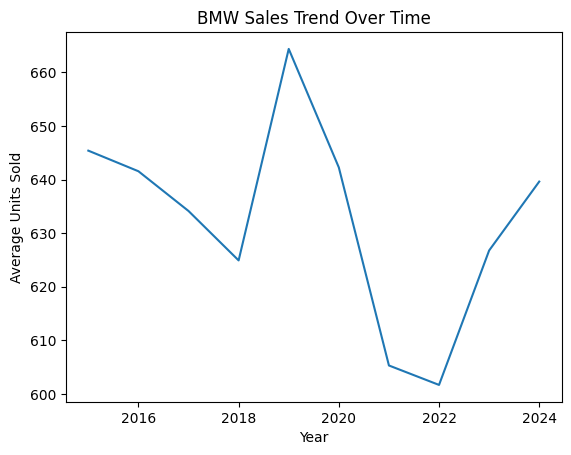

In [10]:
plt.figure()
df.groupby("year")["units_sold"].mean().plot()
plt.xlabel("Year")
plt.ylabel("Average Units Sold")
plt.title("BMW Sales Trend Over Time")
plt.show()

<h2>Country-wise Sales</h2>

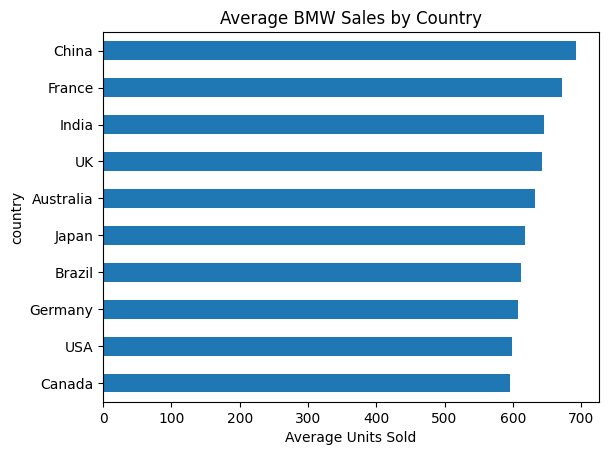

In [11]:
plt.figure()
df.groupby("country")["units_sold"].mean().sort_values().plot(kind="barh")
plt.xlabel("Average Units Sold")
plt.title("Average BMW Sales by Country")
plt.show()

<h2>Engine Type vs Sales</h2>

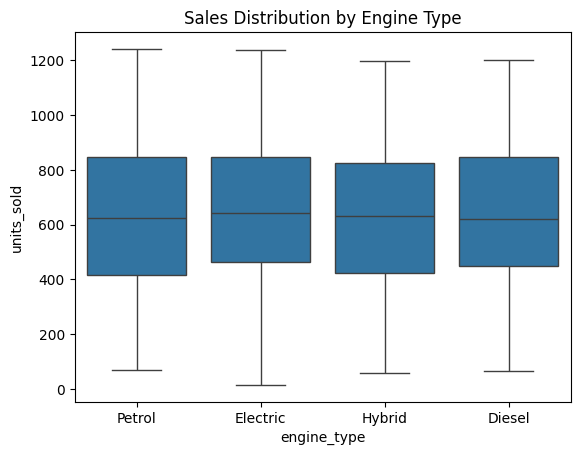

In [12]:
plt.figure()
sns.boxplot(data=df, x="engine_type", y="units_sold")
plt.title("Sales Distribution by Engine Type")
plt.show()

<h1>5. Feature Engineering</h1>

In [14]:
X = df.drop("units_sold", axis=1)
y = df["units_sold"]

categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns

<h1>6. Model Building (Regression)</h1>

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['country', 'model', 'segment', 'engine_type'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['year', 'month', 'price_usd', 'marketing_spend_usd', 'dealership_count',
       'fuel_price_usd', 'gdp_growth_percent', 'interest_rate_percent',
       'competition_index'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

<h1>7. Model Evaluation</h1>

In [16]:
y_pred = pipeline.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 112.09694999999999
R2 Score: 0.7425169835351508


<h1>8. Key Insights</h1>

- Marketing spend and dealership count strongly influence sales
- Electric vehicles show growing sales trends in recent years
- Economic indicators such as GDP growth impact regional performance

<h1>9. Conclusion</h1>

This notebook demonstrates how global automotive sales data can be used
to derive business insights and build predictive models.
The dataset is suitable for regression, time-series analysis, and forecasting tasks.